# Manoeuvres d'un satellite

**Modélisation Numérique en Physique - S2**

**ARGUELLO Camilo**

**SINNATHAMBY Thushara**

## Tableau

1. Introduction
2. Trajectoire d'un satellite artificiel
3. Analyse de la vitesse du satellite
4. Analyse du transfert de Hohmann
5. Conclusion

## Partie 1 - Trajectoire d'un satellite artificiel

On cherche à décrire le mouvement d'un satellite, de masse $m_1$, qui tourne autour de la Terre, de masse $ m_2 $.    
Pour étudier ce mouvement, on se place dans un référentiel galiléen, en considérant un problème à un corps. 

On pose **r** le vecteur position du corps 1 (satellite) par rapport au corps 2 (Terre) : $ r = r_1-r_2 $

La seule force qui intervient est le poids (P) auquel est soumis le satellite.      
Le poids du satellite est assimilé à la force d'attraction gravitationnelle $ F_{1/2} $ qu'exerce la Terre sur ce satellite :  
$$ F_{1/2} = -\frac{G.m_1.m_2}{(r_1 - r_2)^3}.(r_1 - r_2) $$

On introduit la masse réduite : $$ µ = \frac{m_1.m_2}{(m_1+m_2)^3} $$

Et la masse totale : $$ M = m_1 + m_2 $$ 

En simplifiant, on obtient la force $$ F_{1/2} = -\frac{G.µ.M}{r^3} $$ 

La deuxième loi de Newton (PFD) permet de poser :

$$ \sum_i \vec{F_i} = m . \vec{a} $$

Alors : $$ F_{1/2} = m_1. \frac{d^2r_1}{dt^2} $$

$$ - F_{2/1} = m_2. \frac{d^2r_2}{dt^2} $$



> A FINIR 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy.optimize as op
import pandas as pd

Les solutions aux équations du mouvement pour le satellite sont des orbites elliptiques avec la Terre à un foyer de l'ellipse. La période de l'orbite $T$ est liée au demi-grand axe $a$ de l'ellipse:

$$
T^2 = \frac{4 \pi^2 }{G M} a^3
$$

On considère les mesure de temps en années, la distance en UA (Unités Astronomiques, `1 UA = 1.50e11 m`), ainsi que la rélation selon la troisième loi de Kepler $T^2 = a^3$.

In [2]:
# Global variables
#G = 6.67e-11 # m3 kg-1 s-2
# Assuming that T^2 = a
a = 1 # U.A
T_rev = 1 # ans
G = 4 * np.pi ** 2

In [3]:
# Set initial Position and speed
r_0 = 1.0 # radius orbit
M = 1.0 # Mass 

v = np.sqrt(G * M / r_0)

print(v)

6.283185307179586


<img src="https://textimgs.s3.amazonaws.com/boundless-physics/newton-cannon.svg" style="display:block;margin:auto;width:300px;"/>

Si on suppose que $\vec{r} = (x,y)$, et $\vec{v} = \frac{d \vec{r}}{dt} \rightarrow \vec{v} = (v_x, v_y)$ 

$$

X =

\left[\begin{matrix}
x_0\\
y_0\\
v_{x_0}\\
v_{y_0}\\
\end{matrix}\right]

$$

$$

f(X,t) =

\left[\begin{matrix}
v_x\\
v_y\\
- \frac{GM x}{\left(\sqrt{x^2+y^2}\right)^3} \\
- \frac{GM y}{\left(\sqrt{x^2+y^2}\right)^3} \\
\end{matrix}\right]

$$

In [4]:
def derivee(v,t):
    """
    @description   Soit v = (x,y,vx,vy)
                Équation du mouvement: d(x,y,vx,vy)/dt = (vx,vy,-gx,-gy)
                avec g = -GM/(x^2+y^2)^3
    @returns d(x,y,vx,vy)/dt
    """
    # Initialisation de la dérivée
    dv = np.empty(v.shape)
    # Dérivée de la vitesse
    dv[0] = v[2]
    dv[1] = v[3]
    r = np.sqrt( v[0] ** 2 + v[1] ** 2 )
    dv[2] = -( G * M * v[0] ) / r ** 3
    dv[3] = -( G * M * v[1] ) / r ** 3

    return dv

In [5]:
# Position initial
x_0 = 1 # AU
y_0 = 0 # AU
# Tangencial Speed
v_x_0 = 0 # AU/year
v_y_0 = 4 # AU/year

# x0, y0, vx0, vy0
X0 = [ x_0, y_0, v_x_0, v_y_0]

t0 = 0.
tf = 2 # 10 years
tau = .00001 # year

In [6]:
def get_mecanic_energy (x,y,vx,vy):
  """
  @description Énergie mécanique = Énergie Cinetique (T) + Énergie potentielle (U)
  @returns Énergie mécanique du systeme
  """
  T = (1/2) * M * (vx ** 2 + vy ** 2)
  U = - G * M / np.sqrt(x ** 2 + y ** 2)
  return T + U



def get_momentum (x,y,vx,vy):
  """
  @description Moment cinétique
  """
  L = x * vy - y * vx
  return L



def plot_trajectory(x,y, trajectory_type='odeint'):
  """
  @description Plot la trajectoire selon la position x et y
  """
  plt.title(r'Using ' + trajectory_type + ' with $x$ = %g, $v_y$ = %g, and $step$ = %g' \
    % (x_0,v_y_0,tau))
  plt.plot(x,y)
  centerx = 0.
  centery = 0.
  plt.plot(centerx,centery,'ko', label='foyer')
  plt.axis('equal')
  plt.grid()



def plot_energy(t,E):
  """
  @description Plot l'énergie mecanique du système
  """
  plt.title('Energie Mécanique')
  plt.plot(t,E)
  plt.ylabel('E/m')
  plt.grid()

def plot_momentum(t,L):
  """
  @description Plot le moment cinétique du système
  """
  plt.title('Momentum')
  plt.plot(t,L)
  plt.ylabel('L/m')
  plt.grid()
  plt.xlabel('t')



def merge_lists(list1, list2):
  """
  @helper Cette fonction mélange deux listes dans une seule, l'objectif c'est diminuer la complexité et le temps,
          lorsque on veut comparer des points avec l'origin, il faut mieux comparer par pairs (x,y)
  @returns {List}
  """
  merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
  return merged_list



def get_apogee_perigee(points):
  """
  @description Cette fonction donne selon le calcule de distances de satellite par rapport le foyer, la position dans l'apogée, ainsi qu'au périgée
                - Dans notre exemple le foyer se trouve à (0,0)
  """
  distances_to_foyer = [(np.linalg.norm(np.array((p[0],p[1])) - np.array((0,0)))) for p in points]
  i_max = np.argmax(distances_to_foyer)
  i_min = np.argmin(distances_to_foyer)

  apogee = points[i_max]
  perigee = points[i_min]

  return apogee, perigee



def get_center_ellipse(apogee, perigee):
  """
  @description Cette fonction donne le centre de l'ellipse en coordonnées cartesiennes (x,y)
  """
  med_x = (apogee[0] + perigee[0]) / 2
  med_y = (apogee[1] + perigee[1]) / 2
  center = np.array((med_x,med_y))
  return center



def get_line_equation(x, apogee,perigee):
  """
  @description Cette fonction permettre de calculer l'équation d'une droite
  """
  # y = x * m + b
  # slope
  m = (apogee[1] - perigee[1]) / (apogee[0] - perigee[0])
  y = x * m 
  return y, m




def get_perpendicular_line_equation (x, m, center):
  """
  @description Cette fonction donne l'équation de la droite perpeticulaire à celle de la fonction `get_line_equation(..)`
  """
  ## perpendicular
  m_inv = - 1 / m
  b_inv = center[1] - ( m_inv * center[0])
  y_inv = m_inv * x + b_inv 
  return y_inv 




def get_excentricity(points):
  """
  @description Cette fonction calcule l'excentricité selon la trajectoire faite par le satellite
  """
  apogee, perigee = get_apogee_perigee(points)
  med_x = (apogee[0] + perigee[0]) / 2
  med_y = (apogee[1] + perigee[1]) / 2
  medium = np.array((med_x,med_y))

  distances_to_center = [(np.linalg.norm(np.array((p[0],p[1])) - medium)) for p in points]

  # demi grand et petit axes
  a = np.max(distances_to_center)
  b = np.min(distances_to_center)

  if a > b:
    c = np.sqrt(a ** 2 - b ** 2)
  else:
    c = np.sqrt(a ** 2 + b ** 2)

  e = c / a

  return e


    
def Euler(start, end, step, v_ini, derivee, ordre=4):
    '''
        Application de la méthode d'Euler
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((ordre, num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        v[:, i + 1] = v[:, i] + step * derivee(v[:, i], t[i])

    # Argument de sortie
    return t, v

def rk4(start, end, step, v_ini, derivee, ordre=4):
    '''
        Application de la méthode rk4
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((ordre, num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        d1 = derivee(v[:, i], t[i])
        d2 = derivee(v[:, i] + step / 2 * d1, t[i] + step / 2)
        d3 = derivee(v[:, i] + step / 2 * d2, t[i] + step / 2)
        d4 = derivee(v[:, i] + step * d3, t[i] + step)
        v[:, i + 1] = v[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)

    # Argument de sortie
    return t, v

In [7]:
def compare_energy (methodes):
    plt.plot(methodes['Odeint']['t'],methodes['Odeint']['E'], label='Odeint')
    plt.plot(methodes['Euler']['t'],methodes['Euler']['E'], label='Euler')
    plt.plot(methodes['RK4']['t'],methodes['RK4']['E'], label='RK4')
    plt.axis()
    plt.ylabel('E/m')
    plt.xlabel('Temps')
    plt.legend()
    plt.show()

In [8]:
def calculate_trajectory(x,y,vx,vy,t,methode_name):
    E = get_mecanic_energy(x,y,vx,vy)
    points = merge_lists(x,y)
    e = get_excentricity(points)
    L = get_momentum(x,y,vx,vy)
    # steps
    _x = np.arange(-0.5,1.5,.01)
    apogee, perigee = get_apogee_perigee(points)
    center = get_center_ellipse(apogee,perigee)
    _y, m = get_line_equation(_x,apogee,perigee)
    _y_inv = get_perpendicular_line_equation(_x,m, center)
    
    plt.subplot(3,1,1)
    plot_trajectory(x,y,trajectory_type=methode_name)
    #plt.plot(_x,_y)
    #plt.plot(_x,_y_inv)
    plt.plot(center[0],center[1],".", label="center")
    plt.legend()
    
    plt.subplot(3,1,2)
    plot_energy(t,E)

    plt.subplot(3,1,3)
    plot_momentum(t,L)

    plt.tight_layout(h_pad=.1)
    plt.subplots_adjust(top=1.5)
    plt.show()

    print("L'excentricité de l'orbite e=", e)

    return E, L, e

def thread_odeint(methode_name):
    t = np.arange(t0, tf, tau)
    X = odeint(derivee, X0, t)
    x = X[:,0] 
    y = X[:,1]
    vx = X[:,2] # values at any given time index
    vy = X[:,3]
    E,L,e = calculate_trajectory(x,y,vx,vy, t,methode_name)
    return E,L,e,t

def thread_experimental(methode,methode_name):
    t, X = methode(t0, tf, tau, X0, derivee)
    x = X[0,:] 
    y = X[1,:]
    vx = X[2,:] # values at any given time index
    vy = X[3,:]
    E,L,e = calculate_trajectory(x,y,vx,vy, t,methode_name)
    return E,L,e,t

def main():
    methode_name='Odeint'
    E_odeint,L_odeint,e_odeint,t_odeint = thread_odeint(methode_name)

    methode_name='Euler'
    E_euler,L_euler,e_euler,t_euler = thread_experimental(Euler,methode_name)

    methode_name='RK4'
    E_rk4,L_rk4,e_rk4,t_rk4 = thread_experimental(rk4,methode_name)

    summary_methodes = {
        'Odeint': {
            'E': E_odeint,
            'L': L_odeint,
            'e': e_odeint,
            't': t_odeint
        },
        'Euler': {
            'E': E_euler,
            'L': L_euler,
            'e': e_euler,
            't': t_euler
        },
        'RK4': {
            'E': E_rk4,
            'L': L_rk4,
            'e': e_rk4,
            't': t_rk4
        }
    }
    return summary_methodes

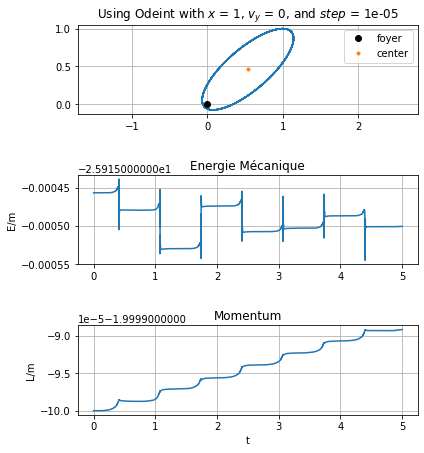

L'excentricité de l'orbite e= 0.9311290076885663


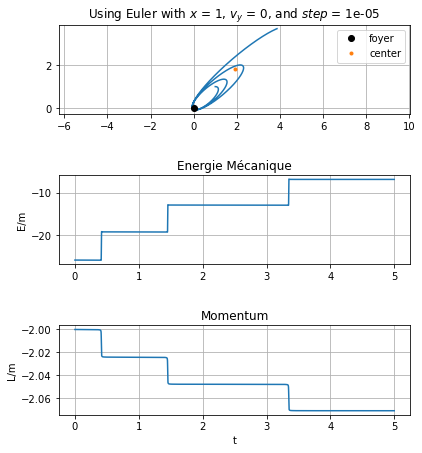

L'excentricité de l'orbite e= 0.9991006362199149


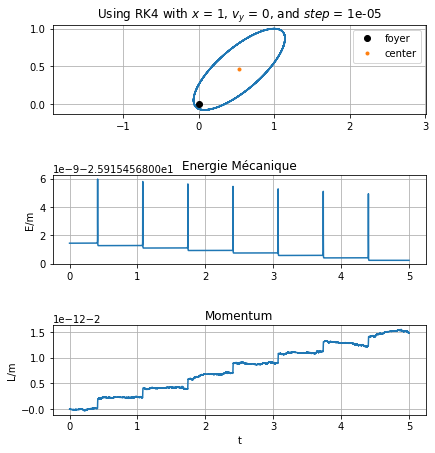

L'excentricité de l'orbite e= 0.9311166851917997


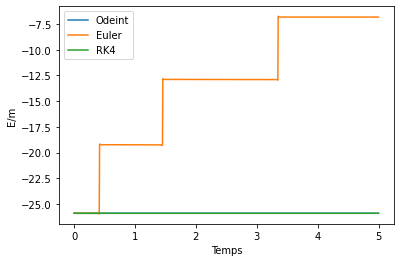

In [9]:
# Position initial UA
x_0 = 1; y_0 = 1; v_x_0 = 2; v_y_0 = 0

# x0, y0, vx0, vy0
X0 = [ x_0, y_0, v_x_0, v_y_0]

tf = 5 # years
tau = .00001 # year

summary_methodes = main()
compare_energy(summary_methodes)

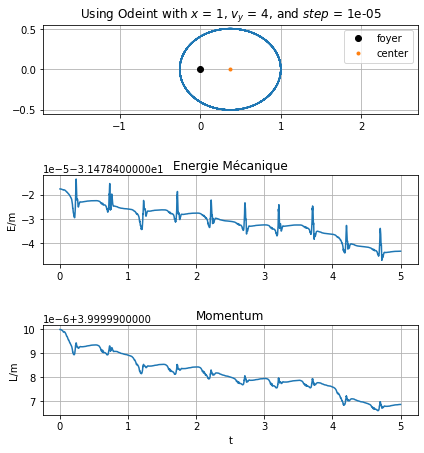

L'excentricité de l'orbite e= 0.5947910181078198


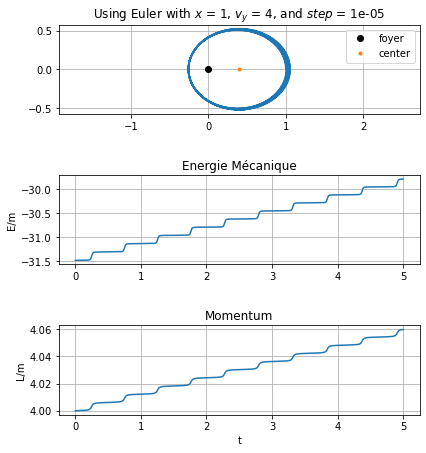

L'excentricité de l'orbite e= 0.6509226324169434


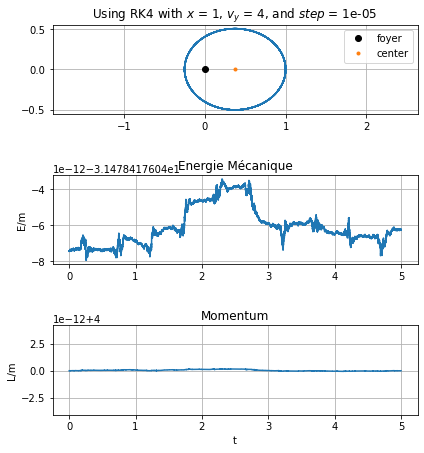

L'excentricité de l'orbite e= 0.5947172976108126


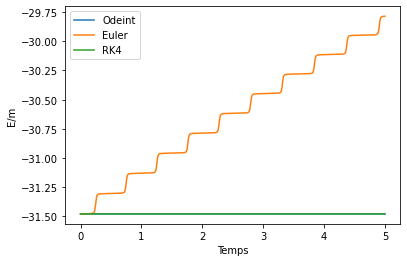

In [10]:
# Position initial UA
x_0 = 1; y_0 = 0; v_x_0 = 0; v_y_0 = 4

# x0, y0, vx0, vy0
X0 = [ x_0, y_0, v_x_0, v_y_0]

tf = 5 # years
tau = .00001 # year

summary_methodes = main()
compare_energy(summary_methodes)

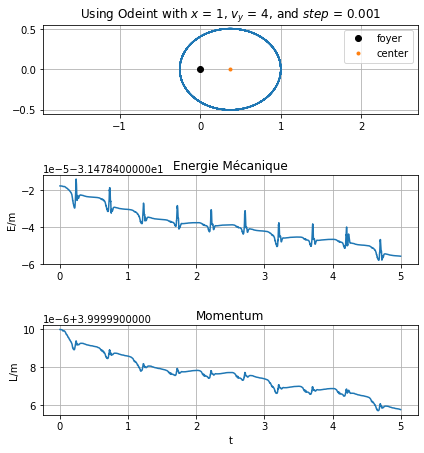

L'excentricité de l'orbite e= 0.595169529840678


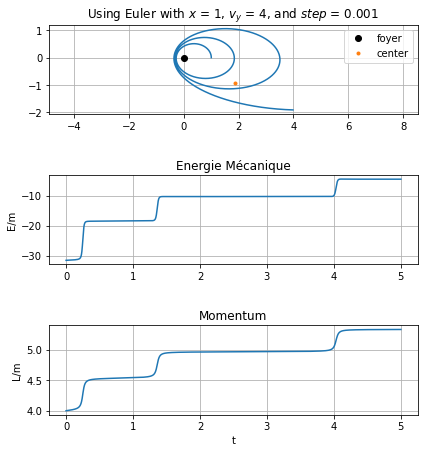

L'excentricité de l'orbite e= 0.9966509935721657


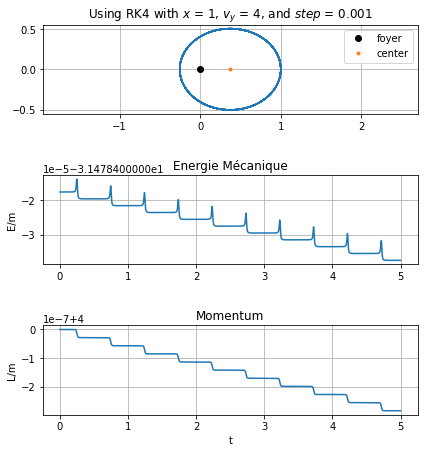

L'excentricité de l'orbite e= 0.5951610465251559


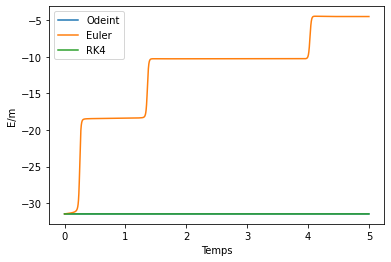

In [11]:
# Position initial UA
x_0 = 1; y_0 = 0; v_x_0 = 0; v_y_0 = 4

# x0, y0, vx0, vy0
X0 = [ x_0, y_0, v_x_0, v_y_0]

tf = 5 # years
tau = .001 # year

summary_methodes = main()
compare_energy(summary_methodes)

$$
E = T + U
$$

Avec $T$ = énergie cinétique, $U$ = énergie potentielle

$$
E = \frac{1}{2} m \vec{v}^2 + \frac{-G M}{\sqrt{x^2+y^2}}
$$

$$
e = \sqrt{1 + \frac{2 E L^2}{m a^2}}
$$


### Trajectoire Elliptique

Le mouvement d'un satellite porsuivre une trajectoire donnée par les sections coniques. On va s'intéresser pour des cas où la trajectoire donne comme résultat une ellipse.

Soient $(d)$ une droite verticale qu'on appel `directrice`, $F$ un point qui n'appartient pas à $(di)$, qu'on appellarait `foyer`, $M$ un `point` sur l'ellipse, et $d$ comme la `distance` de $M$ jusqu'à $F$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Ellipse_foyer_directrice2.svg/660px-Ellipse_foyer_directrice2.svg.png" style="display:block;margin:auto;width:400px" />

À partir de ce raisonnement on peut trouver une rélacion qu'on appel l'`excentricité` $e$.

$$
e = \frac{d(M,F)}{d(M,(d))}
$$

Dans l'ellipse on peut définir les grandeurs présents:

- `a` demi grand axe
- `b` demi petit axe
- `c` distance entre le centre el le foyer
- `h` distance avec la directrice et le foyer
- `e` excentricité $\in [0,1]$ 
- `p` demi lactus rectum

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/EllipseVal.svg/880px-EllipseVal.svg.png" style="display:block;margin:auto;width:400px" >

Dans le plane cartesienne, l'équation de l'ellipse est donné par: 

$$
\left( \frac{x}{a} \right)^2 + \left( \frac{y}{b} \right)^2 = 1
$$

Avec $a \gt b \gt 0 $.

La distance du centre jusqu'à l'une de foyers: 

$$
c = \sqrt{a^2 - b^2} 
$$

L'excentricité $e$:

$$
e = \frac{c}{a} = \frac{ \sqrt{a^2 - b^2} }{a} =  \sqrt{ 1 - \left(\frac{b}{a}\right)^2}
$$

In [39]:
## MEASURE OF ECCENTRICITY WITH DIFFERENTS STEP RATE
## FROM BIGGER VALUES TO SMALLER ONES
## WE CONSIDER THE SAME INITIAL CONDITIONS

def get_energy_analysis_steps (methode_function, methode_name='Euler', iter=7):
    
    steps_label = list()
    eccentricities = list()
    energies = list()
    momentums = list()

    if iter <= 1:
        return None,None,None,None,None

    for i in range(1,iter):
        tf = 3 # years
        tau = 1 / 10 ** i # year
        print("step:", tau)
        if methode_name == "Odeint":
             t = np.arange(t0, tf, tau)
             X = odeint(derivee, X0, t)
             x = X[:,0];y = X[:,1];vx = X[:,2];vy = X[:,3]
        else:
            _, X = methode_function(t0, tf, tau, X0, derivee)
            x = X[0,:];y = X[1,:];vx = X[2,:];vy = X[3,:] 
        
        E = get_mecanic_energy(x,y,vx,vy)
        points = merge_lists(x,y)
        e = get_excentricity(points)
        L = get_momentum(x,y,vx,vy)
        steps_label.append(tau)
        eccentricities.append(e)
        energies.append({
            'error': np.abs(np.max(E) - np.min(E)),
            'mean' : np.array([np.mean(E)]),
            'label' : 'step:' + str(tau)
        })
        momentums.append({
            'error': np.abs(np.max(L) - np.min(L)),
            'mean' : np.array([np.mean(L)]),
            'label' : 'step:' + str(tau)
        })

    energies = np.array(energies)
    eccentricities = np.array(eccentricities)
    momentums = np.array(momentums)
    steps = np.arange(0, len(eccentricities))

    return energies, eccentricities, momentums, steps, steps_label

def plot_energy_analysis_steps(energies, eccentricities, momentums, steps, steps_label, methode_name='Euler'):
    if energies is None:
        return print("There was an error")

    fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(16,5))

    ax0.plot(steps, eccentricities, '+k')
    ax0.set_ylabel('excentricité')

    for i,energy in enumerate(energies):
        _x = np.arange(len(energy['mean'])) + i
        ax1.errorbar(_x,energy['mean'], yerr=energy['error'], marker = '+', linestyle = '',label=energy['label'])

    for i,momentum in enumerate(momentums):
        _x = np.arange(len(momentum['mean'])) + i
        ax2.errorbar(_x,momentum['mean'], yerr=momentum['error'], marker = '+', linestyle = '',label=momentum['label'])

    ax1.set_ylabel('Error')

    ax1.set_title('Analyse des pas avec ' + methode_name)

    ax0.set_xticks(steps,steps_label)
    ax1.set_xticks(steps,steps_label)
    ax2.set_xticks(steps,steps_label)

    ax1.legend()
    ax2.legend()
    plt.show()

step: 0.1
step: 0.01
step: 0.001
step: 0.0001
step: 1e-05


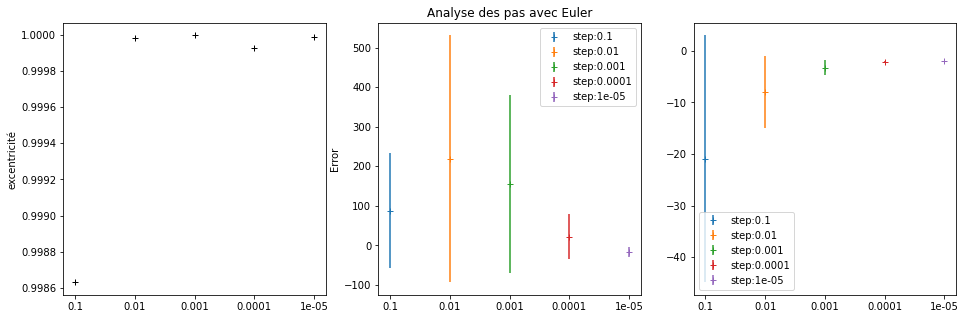

In [42]:
# Position initial UA
x_0 = 1; y_0 = 1; v_x_0 = 2; v_y_0 = 0

# x0, y0, vx0, vy0
X0 = [ x_0, y_0, v_x_0, v_y_0]

methode_name = 'Euler'
methode_function = Euler
iter = 6

energies, eccentricities, momentums, steps, steps_label = get_energy_analysis_steps(methode_function, methode_name, iter)
plot_energy_analysis_steps(energies, eccentricities, momentums, steps ,steps_label, methode_name)

step: 0.1
step: 0.01
step: 0.001
step: 0.0001
step: 1e-05


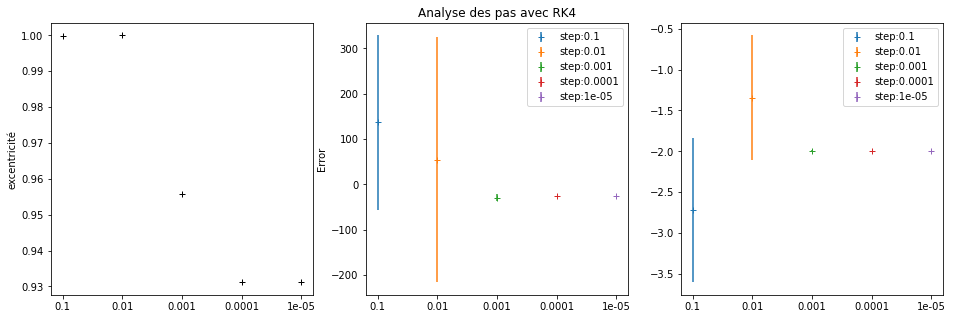

In [43]:
# Position initial UA
x_0 = 1; y_0 = 1; v_x_0 = 2; v_y_0 = 0

# x0, y0, vx0, vy0
X0 = [ x_0, y_0, v_x_0, v_y_0]

methode_name = 'RK4'
methode_function = rk4
iter = 6

energies, eccentricities, momentums, steps, steps_label = get_energy_analysis_steps(methode_function, methode_name, iter)
plot_energy_analysis_steps(energies, eccentricities, momentums, steps ,steps_label, methode_name)

step: 0.1
step: 0.01
step: 0.001
step: 0.0001
step: 1e-05


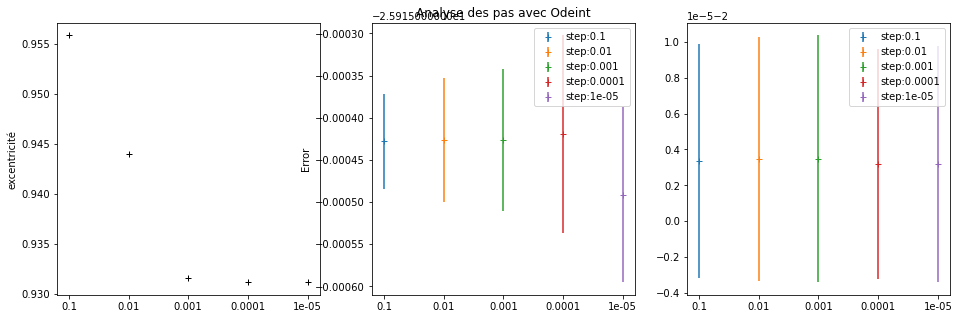

In [44]:
# Position initial UA
x_0 = 1; y_0 = 1; v_x_0 = 2; v_y_0 = 0

# x0, y0, vx0, vy0
X0 = [ x_0, y_0, v_x_0, v_y_0]

methode_name = 'Odeint'
methode_function = odeint
iter = 6

energies, eccentricities, momentums, steps, steps_label = get_energy_analysis_steps(methode_function, methode_name, iter)
plot_energy_analysis_steps(energies, eccentricities, momentums, steps ,steps_label, methode_name)

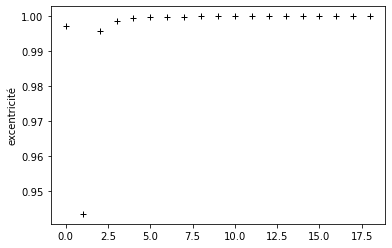

In [46]:
## MEASURE OF ECCENTRICITY WITH DIFFERENT INITAL CONDITIONS
## FROM X & Y CLOSEST TO 0 -> UNTIL VALUES BIGGER THAN 10 FOR BOTH
## WE CONSIDER THE SAME STEP RATE

methode_name='Euler'

steps_label = list()
eccentricities = list()
energies = list()
momentums = list()

for i in range(1,20):
    
    # Position initial UA
    x_0 = i; y_0 = i; v_x_0 = 0; v_y_0 = 4

    # x0, y0, vx0, vy0
    X0 = [ x_0, y_0, v_x_0, v_y_0]
    
    tf = 2 # years
    tau = 0.01 # year
    
    t, X = Euler(t0, tf, tau, X0, derivee)
    x = X[0,:] 
    y = X[1,:]
    vx = X[2,:] # values at any given time index
    vy = X[3,:]
    E = get_mecanic_energy(x,y,vx,vy)
    points = merge_lists(x,y)
    e = get_excentricity(points)
    L = get_momentum(x,y,vx,vy)
    eccentricities.append(e)
    energies.append({
        'error': np.abs(np.max(E) - np.min(E)),
        'mean' : np.array([np.mean(E)]),
        'label' : 'X:' + str(x_0) + ',Y:' + str(y_0)
    })
    momentums.append({
        'error': np.abs(np.max(L) - np.min(L)),
        'mean' : np.array([np.mean(L)]),
        'label' : 'X:' + str(x_0) + ',Y:' + str(y_0)
    })

#steps = np.array(steps)

energies = np.array(energies)
eccentricities = np.array(eccentricities)
momentums = np.array(momentums)
steps = np.arange(0, len(eccentricities))

fig, (ax0) = plt.subplots(1,1)

ax0.plot(steps, eccentricities, '+k')
ax0.set_ylabel('excentricité')
plt.show()

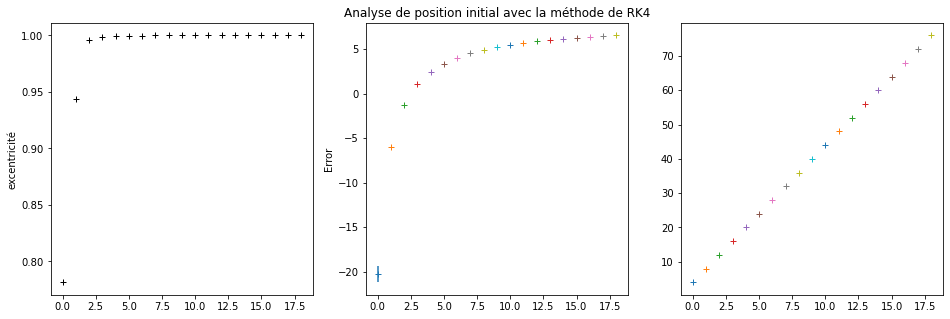

In [197]:
methode_name='RK4'

steps_label = list()
eccentricities = list()
energies = list()
momentums = list()

for i in range(1,20):
    
    # Position initial UA
    x_0 = i; y_0 = i; v_x_0 = 0; v_y_0 = 4

    # x0, y0, vx0, vy0
    X0 = [ x_0, y_0, v_x_0, v_y_0]
    
    tf = 2 # years
    tau = 0.01 # year
    
    t, X = rk4(t0, tf, tau, X0, derivee)
    x = X[0,:] 
    y = X[1,:]
    vx = X[2,:] # values at any given time index
    vy = X[3,:]
    E = get_mecanic_energy(x,y,vx,vy)
    points = merge_lists(x,y)
    e = get_excentricity(points)
    L = get_momentum(x,y,vx,vy)
    eccentricities.append(e)
    energies.append({
        'error': np.abs(np.max(E) - np.min(E)),
        'mean' : np.array([np.mean(E)]),
        'label' : 'X:' + str(x_0) + ',Y:' + str(y_0)
    })
    momentums.append({
        'error': np.abs(np.max(L) - np.min(L)),
        'mean' : np.array([np.mean(L)]),
        'label' : 'X:' + str(x_0) + ',Y:' + str(y_0)
    })

#steps = np.array(steps)

energies = np.array(energies)
eccentricities = np.array(eccentricities)
momentums = np.array(momentums)
steps = np.arange(0, len(eccentricities))

fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(16,5))

ax0.plot(steps, eccentricities, '+k')
ax0.set_ylabel('excentricité')

for i, energy in enumerate(energies):
    _x = np.arange(len(energy['mean'])) + i
    ax1.errorbar(_x,energy['mean'], yerr=energy['error'], marker = '+', linestyle = '',label=energy['label'])

for i,momentum in enumerate(momentums):
    _x = np.arange(len(momentum['mean'])) + i
    ax2.errorbar(_x,momentum['mean'], yerr=momentum['error'], marker = '+', linestyle = '',label=momentum['label'])

ax1.set_ylabel('Error')
ax1.set_title('Analyse de position initial avec la méthode de RK4')

#ax1.legend()
#ax2.legend()
plt.show()

## Partie 2 - Analyse de la vitesse du satellite

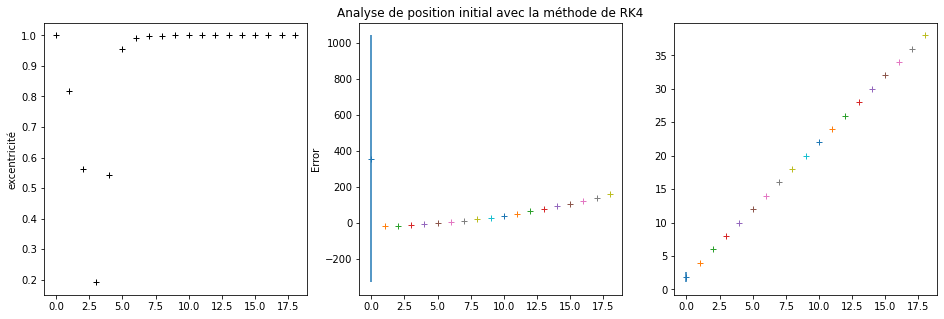

In [198]:
methode_name='RK4'

steps_label = list()
eccentricities = list()
energies = list()
momentums = list()

for i in range(1,20):
    
    # Position initial UA
    x_0 = 2; y_0 = 0; v_x_0 = 0; v_y_0 = i

    # x0, y0, vx0, vy0
    X0 = [ x_0, y_0, v_x_0, v_y_0]
    
    tf = 2 # years
    tau = 0.01 # year
    
    t, X = rk4(t0, tf, tau, X0, derivee)
    x = X[0,:] 
    y = X[1,:]
    vx = X[2,:] # values at any given time index
    vy = X[3,:]
    E = get_mecanic_energy(x,y,vx,vy)
    points = merge_lists(x,y)
    e = get_excentricity(points)
    L = get_momentum(x,y,vx,vy)
    eccentricities.append(e)
    energies.append({
        'error': np.abs(np.max(E) - np.min(E)),
        'mean' : np.array([np.mean(E)]),
        'label' : 'X:' + str(x_0) + ',Y:' + str(y_0)
    })
    momentums.append({
        'error': np.abs(np.max(L) - np.min(L)),
        'mean' : np.array([np.mean(L)]),
        'label' : 'X:' + str(x_0) + ',Y:' + str(y_0)
    })

#steps = np.array(steps)

energies = np.array(energies)
eccentricities = np.array(eccentricities)
momentums = np.array(momentums)
steps = np.arange(0, len(eccentricities))

fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(16,5))

ax0.plot(steps, eccentricities, '+k')
ax0.set_ylabel('excentricité')

for i, energy in enumerate(energies):
    _x = np.arange(len(energy['mean'])) + i
    ax1.errorbar(_x,energy['mean'], yerr=energy['error'], marker = '+', linestyle = '',label=energy['label'])

for i,momentum in enumerate(momentums):
    _x = np.arange(len(momentum['mean'])) + i
    ax2.errorbar(_x,momentum['mean'], yerr=momentum['error'], marker = '+', linestyle = '',label=momentum['label'])

ax1.set_ylabel('Error')
ax1.set_title('Analyse de la vitesse initial avec la méthode de RK4')

#ax1.legend()
#ax2.legend()
plt.show()